In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from itertools import chain
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/hpp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hpp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hpp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
directory = '~/PycharmProjects/tfm_hugopobil'

# Text to BOW begins from this dataset
df = pd.read_csv(f'{directory}/data/tweets_nlp_modelling.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23317 entries, 0 to 23316
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_clean        23317 non-null  object 
 1   tweets            23317 non-null  object 
 2   cleaned_tweets    23273 non-null  object 
 3   crypto_sentiment  22467 non-null  object 
 4   subjectivity      23317 non-null  float64
 5   polarity          23317 non-null  float64
 6   sentiment         23317 non-null  object 
 7   target            23317 non-null  bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 1.3+ MB


In [18]:
df.head()

,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-10-28,"Airdrop is live , dont be late sir :)\n\n\n\n\...",Airdrop live dont late sir Airdrop Airdrops Ai...,negative,0.550000,-0.081818,negative,True
1,2021-10-22,something Big is coming \n$KLV Klever 💜🌟\n\nBT...,something Big coming KLV Klever BTC ETH BNB TR...,negative,0.100000,0.000000,positive,False
2,2021-08-16,Easy money with \n\n bsc bnb BinanceSmartChain...,Easy money bsc bnb BinanceSmartChain binance g...,negative,0.833333,0.433333,neutral,False
3,2021-10-19,NanoDogecoin is the King👑of the BSC Blockchain...,NanoDogecoin King BSC Blockchain DeFi altcoins...,negative,0.733333,0.433333,neutral,False
4,2021-12-30,"Bitcoin News Roundup for June 17, 2020 cryptoc...",Bitcoin News Roundup June cryptocurrencies bit...,positive,0.000000,0.000000,positive,True


In [19]:
# Into lower case and strip
df['cleaned_tweets'] = df.cleaned_tweets.str.lower().str.strip()

In [20]:
df.head()

,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-10-28,"Airdrop is live , dont be late sir :)\n\n\n\n\...",airdrop live dont late sir airdrop airdrops ai...,negative,0.550000,-0.081818,negative,True
1,2021-10-22,something Big is coming \n$KLV Klever 💜🌟\n\nBT...,something big coming klv klever btc eth bnb tr...,negative,0.100000,0.000000,positive,False
2,2021-08-16,Easy money with \n\n bsc bnb BinanceSmartChain...,easy money bsc bnb binancesmartchain binance g...,negative,0.833333,0.433333,neutral,False
3,2021-10-19,NanoDogecoin is the King👑of the BSC Blockchain...,nanodogecoin king bsc blockchain defi altcoins...,negative,0.733333,0.433333,neutral,False
4,2021-12-30,"Bitcoin News Roundup for June 17, 2020 cryptoc...",bitcoin news roundup june cryptocurrencies bit...,positive,0.000000,0.000000,positive,True


In [26]:
df['cleaned_tweets'] = str(df['cleaned_tweets'])

In [43]:
corpus = ' '.join(df["cleaned_tweets"])
all_words = word_tokenize(corpus)
stopwords = nltk.corpus.stopwords.words('english')
stop_words = stopwords + ['...', ':', ',', '.']
all_words = [word for word in all_words if word not in stop_words]

In [44]:
all_words = [x for x in all_words if not any(c.isdigit() for c in x)]

In [66]:
pd.DataFrame(all_words).to_csv(f'{directory}/data/all_words.csv')

<AxesSubplot:>

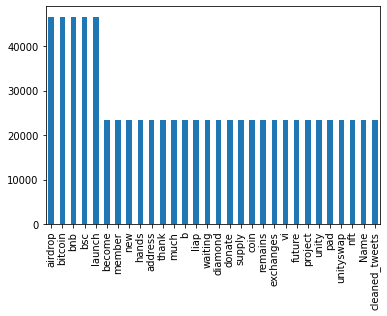

In [46]:
Counter(["a","a","b"])
pd.Series(Counter(all_words)).sort_values(ascending=False).iloc[:30].plot(kind="bar")

In [51]:
corpus = df.cleaned_tweets.to_numpy()
cv = CountVectorizer()
cv_matrix = cv.fit_transform(all_words)

feature_names = cv.get_feature_names_out()
dense = cv_matrix.todense()
denselist = dense.tolist()

df_matrix = pd.DataFrame(denselist, columns=feature_names)
print(df_matrix.shape)
df_matrix.head()

(1585556, 61)


,address,ai,airdrop,airdrops,altcoins,become,big,binance,binancesmartchain,bit,...,roundup,sir,something,supply,thank,tr,unity,unityswap,vi,waiting
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
pd.DataFrame(df_matrix).to_csv(f'{directory}/data/tweets_words_matrix.csv')

In [78]:
df_matrix.shape

(1585556, 61)